In [3]:
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from timerun import time_code, time_func
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the madelon training dataset
train_data = pd.read_table("MADELON/madelon_train.data", sep=' ', header=None, usecols=range(0,500))
train_labels = pd.read_table("MADELON/madelon_train.labels", sep=' ', header=None)
X_train, X_test = np.split(train_data.to_numpy(), [1600])
y_train, y_test = np.split(np.ravel(train_labels.to_numpy()), [1600])

In [29]:
import random
def randomSelection(CVal):
    random_scores_train = {}
    random_scores_test = {}
    random_selection = random.sample(range(0, 500), 500)
    for i in range(1, 500, 2):
        features = random_selection[:i]
    
        svm = LinearSVC(C=CVal, max_iter=2000, dual=False)
        svm.fit(X_train[:,features], y_train)

        random_scores_train[i] = svm.score(X_train[:,features], y_train)
        random_scores_test[i] = svm.score(X_test[:,features], y_test)
    return random_scores_train, random_scores_test

rscore = {}
for k in range(10):
    rscore[k] = {}
    for i in [1, 1000]:
        with time_code('TEST C#' + str(i)):
            rscore[k][i] = randomSelection(i)

TEST C#1 - 00:02:55.637431100
TEST C#1000 - 00:02:44.250130800
TEST C#1 - 00:02:39.028292700
TEST C#1000 - 00:03:03.360514500
TEST C#1 - 00:02:55.197301400
TEST C#1000 - 00:02:16.365335000
TEST C#1 - 00:02:09.920739000
TEST C#1000 - 00:02:04.706137000
TEST C#1 - 00:01:51.933323800
TEST C#1000 - 00:02:11.507652000
TEST C#1 - 00:02:07.853616900
TEST C#1000 - 00:02:07.878777900
TEST C#1 - 00:02:13.291711200
TEST C#1000 - 00:02:06.911318200
TEST C#1 - 00:02:20.762796400
TEST C#1000 - 00:02:20.954920500
TEST C#1 - 00:02:26.087289500
TEST C#1000 - 00:02:43.219795900
TEST C#1 - 00:02:59.194625500
TEST C#1000 - 00:03:07.413463400


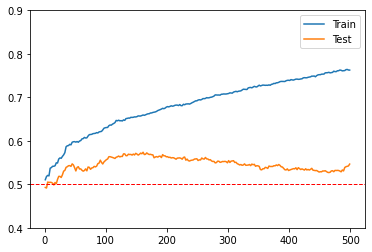

In [37]:
tscore = {}
for c in [1, 1000]:
    tscore[c] = ({}, {})
    for x in rscore[0][c][0].keys():
        yT = np.mean([rscore[k][c][0][x] for k in range(10)])
        yt = np.mean([rscore[k][c][1][x] for k in range(10)])
        tscore[c][0][x] = yT
        tscore[c][1][x] = yt

xscore = tscore[1]
plt.plot(xscore[0].keys(), xscore[0].values(), label = "Train")
plt.plot(xscore[1].keys(), xscore[1].values(), label = "Test")
plt.legend()
plt.ylim([0.4,0.9])
plt.axhline(0.5, color = "red", linewidth=1, linestyle="--")
plt.show()

In [51]:
import pickle
f = open("svm-madelon-base-data-random.pkl","wb")
pickle.dump(rscore,f)
f.close()

import json

json = json.dumps(rscore)
f = open("svm-madelon-base-data-random.json","w")
f.write(json)
f.close()